In [29]:
import quandl
import pandas as pd

quandl.ApiConfig.api_key = 'YyZVhKoh9-mvR_zTEeh5'
df_amazon = quandl.get("WIKI/AMZN")
df_amazon.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
1997-05-16,22.38,23.75,20.50,20.75,1225000.0,0.0,1.0,1.865000,1.979167,1.708333,1.729167,14700000.0
1997-05-19,20.50,21.25,19.50,20.50,508900.0,0.0,1.0,1.708333,1.770833,1.625000,1.708333,6106800.0
1997-05-20,20.75,21.00,19.63,19.63,455600.0,0.0,1.0,1.729167,1.750000,1.635833,1.635833,5467200.0
1997-05-21,19.25,19.75,16.50,17.13,1571100.0,0.0,1.0,1.604167,1.645833,1.375000,1.427500,18853200.0
1997-05-22,17.25,17.38,15.75,16.75,981400.0,0.0,1.0,1.437500,1.448333,1.312500,1.395833,11776800.0


<h5> We only want to use <i> Adj. Close </i> for our analysis </h5>

In [30]:
df_amazon = df_amazon[['Adj. Close']]
df_amazon

,Adj. Close
Date,
1997-05-16,1.729167
1997-05-19,1.708333
1997-05-20,1.635833
1997-05-21,1.427500
1997-05-22,1.395833
...,...
2018-03-21,1581.860000
2018-03-22,1544.100000
2018-03-23,1495.560000


<h3> Amazon Stock Prices </h3>

In [31]:
import numpy as np
import matplotlib.pyplot as plt


from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

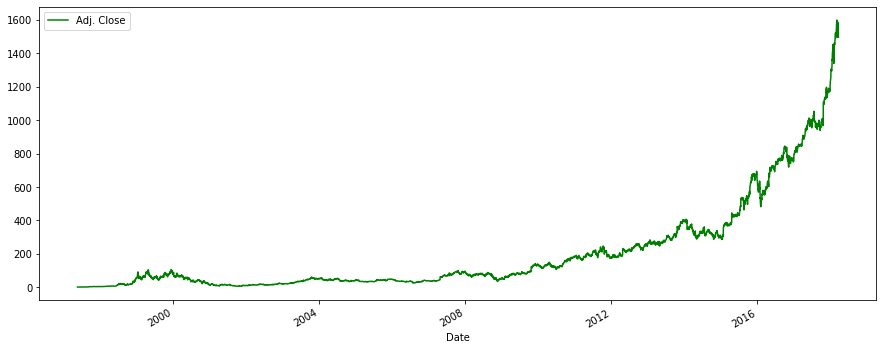

In [32]:
df_amazon['Adj. Close'].plot(figsize=(15,6), color = 'g')
plt.legend(loc='upper left')
plt.show()

#### Trying to predict stock prices 30 days into the future

In [33]:
forecast = 30 # days
df_amazon['Prediction'] = df_amazon[['Adj. Close']].shift(-forecast)
df_amazon

,Adj. Close,Prediction
Date,,
1997-05-16,1.729167,1.541667
1997-05-19,1.708333,1.515833
1997-05-20,1.635833,1.588333
1997-05-21,1.427500,1.911667
1997-05-22,1.395833,2.000000
...,...,...
2018-03-21,1581.860000,NaN
2018-03-22,1544.100000,NaN
2018-03-23,1495.560000,NaN


In [34]:
X = np.array(df_amazon.drop(['Prediction'],1))
X = preprocessing.scale(X)

X_forecast = X[-forecast:]
X = X[:-forecast]

In [35]:
y = np.array(df_amazon['Prediction'])
y = y[:-forecast]

### Applying linear regression

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

new = LinearRegression()
new.fit(X_train, y_train)

LinearRegression()

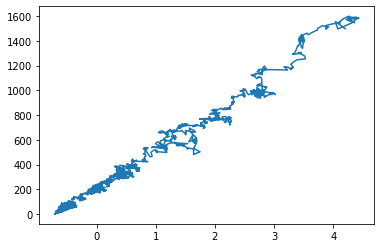

In [37]:
plt.plot(X,y)

In [38]:
confidence = new.score(X_test, y_test)
confidence # quite close to 1

0.9894766257286516

In [41]:
forecast_predicted = new.predict(X_forecast)
print(forecast_predicted) #these are the predicted values of the last 30 days

[1501.9258008  1540.81347501 1552.21158641 1538.30184635 1559.22499017
 1574.73110437 1576.68932333 1592.90848466 1616.26875967 1605.65819284
 1606.15839007 1585.93765088 1593.17454701 1618.03541372 1632.96683324
 1640.79970905 1648.10046015 1676.86712227 1697.61998617 1686.75399948
 1689.75518287 1680.51749781 1669.19388387 1640.72521159 1684.97670293
 1680.02794308 1639.84188456 1588.18321718 1652.35745787 1589.76894883]


In [42]:
len(forecast_predicted) # checks out

30

#### Visualizing our Predicted Results

In [44]:
import datetime

dates = pd.date_range(start= "2018-03-28", end ="2018-04-26")
dates

DatetimeIndex(['2018-03-28', '2018-03-29', '2018-03-30', '2018-03-31',
               '2018-04-01', '2018-04-02', '2018-04-03', '2018-04-04',
               '2018-04-05', '2018-04-06', '2018-04-07', '2018-04-08',
               '2018-04-09', '2018-04-10', '2018-04-11', '2018-04-12',
               '2018-04-13', '2018-04-14', '2018-04-15', '2018-04-16',
               '2018-04-17', '2018-04-18', '2018-04-19', '2018-04-20',
               '2018-04-21', '2018-04-22', '2018-04-23', '2018-04-24',
               '2018-04-25', '2018-04-26'],
              dtype='datetime64[ns]', freq='D')

(17337.0, 18029.5)

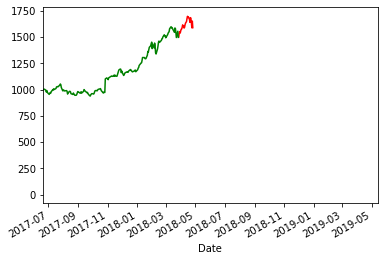

In [57]:
plt.plot(dates,forecast_predicted,color='r')
df_amazon['Adj. Close'].plot(color='g')
plt.xlim(xmin=datetime.date(2017,6,20)) # we have to zoom in to understand the plot and the data 